In [150]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
import numpy as np 
from matplotlib import pyplot as plt 

In [296]:
import pandas as pd
import numpy as np

df = pd.read_excel("label_data.2020-10-28.xls")
## 删除未打标数据
df.drop(df[np.isnan(df['label'])].index, inplace=True)
## 含有click_by_pv=‘\N’脏数据
df = df.drop(df[df['click_by_pv'] == '\N'].index)

x_data = df[["pos","ctr_cqr","bert_score","pos_score","click_by_pv"]].values
y_data= df["label"].values

In [297]:
from sklearn.model_selection import train_test_split

x = scale(x_data)
y = scale(y_data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.15)

E:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [308]:
sgdr = SGDRegressor(max_iter=10000,alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='l2')
sgdr.fit(x_train, y_train)

score = sgdr.score(x_train, y_train)
print "score ->",score

score -> 0.34540672714582066


In [309]:
y_pred = sgdr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

('MSE: ', 0.8903941226927391)
('RMSE: ', 0.44519706134636955)


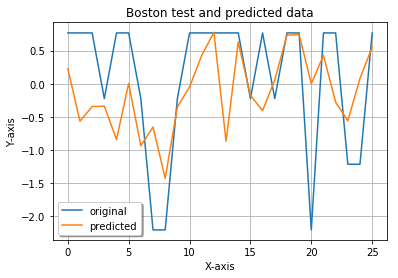

In [310]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [303]:
# 获得预测模型的参数
print len(sgdr.coef_)
#获得预测模型的截距
print sgdr.intercept_

5
[-0.02875136]


In [304]:
y = "y="
for i in range(len(sgdr.coef_)):
    w = str(sgdr.coef_[i])
    y = y + "+" + w + "x" + str(i)
b = str(sgdr.intercept_[0])
y = y + "+" + b
print y

y=+-0.16407719881820437x0+0.05060212838527495x1+0.37094324393634476x2+0.16407719881820462x3+-0.038884292966497x4+-0.028751355232435414
